In [0]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   321  100   321    0     0   1735      0 --:--:-- --:--:-- --:--:--  1735
Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path = Path(base_dir + 'l3-imdb')
dest = path
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path = untar_data(URLs.IMDB_SAMPLE, dest=dest)
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/l3-imdb/imdb_sample/texts.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/l3-imdb/imdb_sample/data_save.pkl')]

In [0]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [0]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [0]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [0]:
data_lm.save()

In [0]:
data = load_data(path)

In [0]:
data = TextClasDataBunch.from_csv(path, 'texts.csv')
data.show_batch()

text,target
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i xxunk a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos i really wanted to love this show . i truly , honestly did . \n \n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",negative
"xxbos \n \n i 'm sure things did n't exactly go the same way in the real life of xxmaj homer xxmaj hickam as they did in the film adaptation of his book , xxmaj rocket xxmaj boys , but the movie "" xxmaj october xxmaj sky "" ( an xxunk of the book 's title ) is good enough to stand alone . i have not read xxmaj",positive
"xxbos xxmaj to review this movie , i without any doubt would have to quote that memorable scene in xxmaj tarantino 's "" xxmaj pulp xxmaj fiction "" ( xxunk ) when xxmaj jules and xxmaj vincent are talking about xxmaj mia xxmaj wallace and what she does for a living . xxmaj jules tells xxmaj vincent that the "" xxmaj only thing she did worthwhile was pilot "" .",negative


In [0]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the']

In [0]:
data.train_ds[0][0]

Text xxbos xxunk is normally exploitive , and it 's never really bothered me before -- i loved " xxunk 2 " , but i really do n't like pseudo xxunk or playing on xxunk . the whole movie is based on a man with esp caused by an electrical accident and a witch . i 'm not opposed to witches , and i liked " carrie " ( the novel and the movie ) but this one bothered me . i think it 's because of the main character developing esp from an electric line . also the university professor wasting his time studying esp cases . i was n't alive in the 60s to know first hand whether or not esp was a common xxunk then , but i assume that any theory of such nature would simply be xxunk . what really bothered me was the way the police were describing xxunk as ruthless , unpredictable villains who can seem like normal people 99 % of the time and then just snap . nothing could be further from the truth . i detest such concepts because they add to public idiocy . many people still think that xxunk is xxunk id

In [0]:
data.train_ds[0][0].data[:10]

array([   2,    0,   16, 2201, 6092,   10,   12,   17,   23,  123])

In [0]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
        .split_from_df(col=2)
        .label_from_df(cols=0)
        .databunch()
       )

In [0]:
bs=48

In [0]:
path = untar_data(URLs.IMDB, dest=dest)
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/l3-imdb/imdb/imdb.vocab'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/l3-imdb/imdb/README'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/l3-imdb/imdb/train'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/l3-imdb/imdb/tmp_lm'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/l3-imdb/imdb/test'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/l3-imdb/imdb/tmp_clas'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/l3-imdb/imdb/unsup'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/l3-imdb/imdb/data_lm.pkl'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/l3-imdb/imdb/models'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/l3-imdb/imdb/data_clas.pkl')]

In [0]:
(path/'train').ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/l3-imdb/imdb/train/labeledBow.feat'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/l3-imdb/imdb/train/unsupBow.feat'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/l3-imdb/imdb/train/neg'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/l3-imdb/imdb/train/pos')]

In [0]:
data_lm = (TextList.from_folder(path)
           .filter_by_folder(include=['train','test','unsup'])
           .split_by_rand_pct(0.1)
           .label_for_lm()
           .databunch(bs=bs)
          )
data_lm.save('data_lm.pkl')

In [0]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [0]:
data_lm.show_batch()

idx,text
0,"action packed , though absurd in the premise , and then it deteriorated into a slow , painful , sophomoric dissolution of the series . xxmaj unbelievable how slow and drawn out that last hour was . xxmaj were we to think more deeply ? xxmaj if i wanted a lesson in a - materialism , i would reread xxmaj daniel xxmaj quinn 's xxmaj ishmael . xxmaj absurd to"
1,". xxmaj there are some good parts through the movie , the first half starts off slow and then in the last half the pace picks up . xxmaj all up the movie is enjoyable . xxmaj the story is 22 years after the events that occured in the first film , xxmaj norman xxmaj bates is out of an asylum and back to the xxmaj bates motel , but"
2,"after his relation with her many years ago , despite her remarrying and setting up home in xxmaj morocco . xxmaj as builder he now rebuilds his own life and recovers hers by taking the mask of xxmaj cécile 's marriage . xxmaj having accomplished this , he is buried after a freak accident ( literally ) and becomes a comatose . xxmaj he wakes only after she has burned"
3,"pretty hilarious how they all talk about how this movie was so great and so scary . i mean how do you not realize that the movies is a cheap rip off of "" xxmaj scary xxmaj movie "" for example . xxmaj at least get some good actors in there and then maybe it would have been pulled off as a good horror movie . xxbos xxmaj other than"
4,"some of the actors give it their best shot . xxmaj michael xxmaj des xxmaj barres does okay with what he is given to do , which is to act like a sex addict out of control . i ca n't say that it is pleasant to watch . \n \n xxmaj nastassja xxmaj kinski as the therapist sits in a chair for practically the entire film , with"


In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


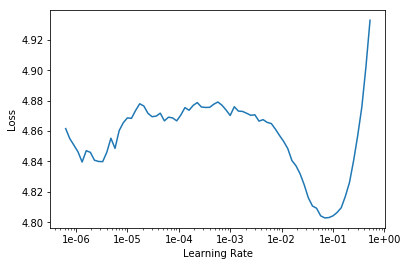

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.204920,4.036645,0.290470,10:54


In [0]:
learn.save('fit_head')

In [0]:
learn.load('fit_head')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (27454 items)
x: LMTextList
xxbos xxmaj horrible ending - and i ca n't believe xxmaj moore spent a year coming up with it . xxmaj smacks of xxup l. xxmaj ron xxmaj hubbard and xxmaj xxunk , which xxmaj hubbard claimed to pen in just three weeks . xxmaj this was actually disappointing enough for me to toss my discs from the first 3.5 years . xxmaj now , the first 1.5 hours were action packed , though absurd in the premise , and then it deteriorated into a slow , painful , sophomoric dissolution of the series . xxmaj unbelievable how slow and drawn out that last hour was . xxmaj were we to think more deeply ? xxmaj if i wanted a lesson in a - materialism , i would reread xxmaj daniel xxmaj quinn 's xxmaj ishmael . xxmaj absurd to think 38 k people would give up everything for a " fresh start " . xxmaj absurd to throw in a disappearing xxmaj kara , and a reappearing xxmaj xxunk and xxmaj six . xxmaj absurd to throw in the xxmaj xxunk

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.940291,3.935361,0.301197,12:38
1,3.840852,3.869266,0.308520,12:38
2,3.804961,3.825590,0.313334,12:36
3,3.713791,3.794418,0.317082,12:36
4,3.631890,3.775974,0.319841,12:35
5,3.547179,3.765615,0.321563,12:37
6,3.469834,3.760686,0.322648,12:37
7,3.382077,3.762065,0.322997,12:38
8,3.327897,3.767230,0.322655,12:40
9,3.305606,3.771553,0.322519,12:39


In [0]:
learn.save('fine_tuned')

In [0]:
learn.load('fine_tuned')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (27454 items)
x: LMTextList
xxbos xxmaj horrible ending - and i ca n't believe xxmaj moore spent a year coming up with it . xxmaj smacks of xxup l. xxmaj ron xxmaj hubbard and xxmaj xxunk , which xxmaj hubbard claimed to pen in just three weeks . xxmaj this was actually disappointing enough for me to toss my discs from the first 3.5 years . xxmaj now , the first 1.5 hours were action packed , though absurd in the premise , and then it deteriorated into a slow , painful , sophomoric dissolution of the series . xxmaj unbelievable how slow and drawn out that last hour was . xxmaj were we to think more deeply ? xxmaj if i wanted a lesson in a - materialism , i would reread xxmaj daniel xxmaj quinn 's xxmaj ishmael . xxmaj absurd to think 38 k people would give up everything for a " fresh start " . xxmaj absurd to throw in a disappearing xxmaj kara , and a reappearing xxmaj xxunk and xxmaj six . xxmaj absurd to throw in the xxmaj xxunk

In [0]:
TEXT = "I like this movie because"
N_WORDS = 40
N_SENTENCES = 2

In [0]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I like this movie because during the whole movie i felt like i was watching an episode of Alien . i thought it was a very interesting family movie . It had an extremely slow pace and the acting was n't bad .
I like this movie because it is one of the best movies ever , and i highly recommend it to everyone . The movie is " great " , and that 's because the movie is about the true nature of the world .


In [0]:
learn.save_encoder('fine_tuned_enc')


Classifier

Now, we'll create a new data object that only grabs the labelled data and keeps those labels. Again, this line takes a bit of time.


In [0]:
path = untar_data(URLs.IMDB, dest=dest)

In [0]:
data_class = (TextList.from_folder(path, vocab=data_lm.vocab)
              .split_by_folder(valid='test')
              .label_from_folder(classes=['neg','pos'])
              .databunch(bs=bs)
             )
data_class.save('data_clas.pkl')

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:445: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


KeyboardInterrupt: ignored

In [0]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [0]:
data_clas.show_batch()

text,target
"xxbos * * * xxmaj warning - this review contains "" plot spoilers , "" though nothing could "" spoil "" this movie any more than it already is . xxmaj it really xxup is that bad . * * * \n \n xxmaj before i begin , i 'd like to let everyone know that this definitely is one of those so - incredibly - bad - that",neg
"xxbos xxmaj this movie was recently released on xxup dvd in the xxup us and i finally got the chance to see this hard - to - find gem . xxmaj it even came with original theatrical previews of other xxmaj italian horror classics like "" xxup xxunk "" and "" xxup beyond xxup the xxup darkness "" . xxmaj unfortunately , the previews were the best thing about this",neg
"xxbos xxmaj heavy - handed xxunk . xxmaj writers using characters as xxunk to speak for themselves . xxmaj predictable , plodding plot points ( say that five times fast ) . a child 's imitation of xxmaj britney xxmaj spears . xxmaj this film has all the earmarks of a xxmaj lifetime xxmaj special reject . \n \n i honestly believe that xxmaj jesus xxmaj xxunk and xxmaj",neg
"xxbos i have never seen any of xxmaj spike xxmaj lee 's prior films , as their trailers never caught my interest . i have seen , and admire xxmaj denzel xxmaj washington , and xxmaj jodie xxmaj foster 's work , and have several of their dvds . i was , however , entirely disappointed with this movie . xxmaj if this film is any indication of xxmaj spike",neg
"xxbos xxmaj pier xxmaj paolo xxmaj pasolini , or xxmaj pee - pee - pee as i prefer to call him ( due to his love of showing male genitals ) , is perhaps xxup the most overrated xxmaj european xxmaj marxist director - and they are thick on the ground . xxmaj how anyone can see "" art "" in this messy , cheap sex - romp concoction is",neg


In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


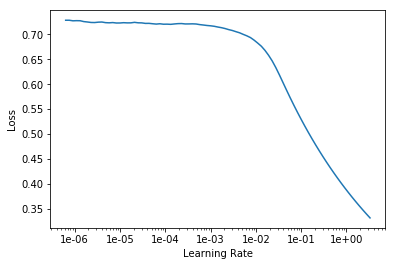

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

In [0]:
learn.save('first')

In [0]:
learn.load('first')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (5504 items)
x: TextList
xxbos xxmaj horrible ending - and i ca n't believe xxmaj moore spent a year coming up with it . xxmaj smacks of xxup l. xxmaj ron xxmaj hubbard and xxmaj xxunk , which xxmaj hubbard claimed to pen in just three weeks . xxmaj this was actually disappointing enough for me to toss my discs from the first 3.5 years . xxmaj now , the first 1.5 hours were action packed , though absurd in the premise , and then it deteriorated into a slow , painful , sophomoric dissolution of the series . xxmaj unbelievable how slow and drawn out that last hour was . xxmaj were we to think more deeply ? xxmaj if i wanted a lesson in a - materialism , i would reread xxmaj daniel xxmaj quinn 's xxmaj ishmael . xxmaj absurd to think 38 k people would give up everything for a " fresh start " . xxmaj absurd to throw in a disappearing xxmaj kara , and a reappearing xxmaj xxunk and xxmaj six . xxmaj absurd to throw in the xxmaj xxunk xxmaj

In [0]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4), 1e-2), moms=(0.8,0.7))